In [1]:
#Two-Qubit Gates - XOR
#Amitava Chakraborty - 13th Jan 2018
from qiskit import IBMQ
# Loading your IBM Q account(s)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.circuit.library import HGate, RZGate, CXGate, CCXGate, XGate, SwapGate
from qiskit.circuit import ControlledGate

u_backend = BasicAer.get_backend('unitary_simulator')
s_backend = BasicAer.get_backend('statevector_simulator')
q_backend = BasicAer.get_backend('qasm_simulator')

In a quantum computer, an XOR gate is implemented by a controlled-NOT (CNOT) gate.

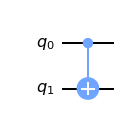

In [6]:
qc = QuantumCircuit(2)
cx = CXGate()
#x = XGate()
#qc = qc.compose(x,[0]).compose(cx, [0, 1])
qc = qc.compose(cx, [0, 1])
#qc = qc.compose(x, [0])
qc.draw(output='mpl')

If we apply this circuit to a pair of qubits - the target becomes ```0``` if they are the same, and ```1``` if they are different.

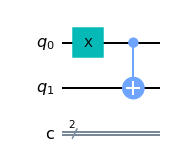

In [10]:
qc = QuantumCircuit(2,2)
cx = CXGate()
x = XGate()
qc = qc.compose(x,[0]).compose(cx, [0, 1])
#qc = qc.compose(cx, [0, 1])
#qc = qc.compose(x, [0])

#qc.measure(0,0)
#qc.measure(1,1)

qc.draw(output='mpl')

In [11]:
job = execute(qc, u_backend)
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

E:\DevelopmentEnvironments\Anaconda3\envs\qiskit25\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


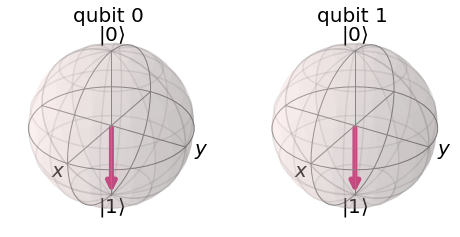

In [12]:
job = execute(qc, s_backend)
plot_bloch_multivector (job.result().get_statevector(qc))